In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, MaxPooling2D, Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

train_path = '/content/drive/My Drive/Machine learning project/Facial emotion recognition/Dataset/Training/'
val_path = '/content/drive/My Drive/Machine learning project/Facial emotion recognition/Dataset/Testing/'
result_path = '/content/drive/My Drive/Machine learning project/Facial emotion recognition/Result'

Mounted at /content/drive


In [ ]:
from google.colab.patches import cv2_imshow
import os
def display_example(img_path, label):
  image = cv2.imread(img_path)
  cv2_imshow(image)
  print("Label: ", label)

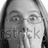

Label:  Suprise
----------------


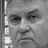

Label:  Sad
----------------


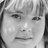

Label:  Neutral
----------------


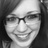

Label:  Happy
----------------


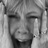

Label:  Fear
----------------


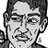

Label:  Angry
----------------


In [ ]:
emotions = ['Suprise', 'Sad', 'Neutral', 'Happy', 'Fear', 'Angry']
for emotion in emotions:
  display_example(val_path + emotion + '/' + emotion + '.jpg', emotion)
  print('----------------')

In [ ]:
train_gen = ImageDataGenerator(rescale=1./255, 
                               horizontal_flip = True,
                               rotation_range=10)
val_gen = ImageDataGenerator(rescale = 1./255)
train_generator = train_gen.flow_from_directory(train_path, 
                                                target_size = (48,48),
                                                class_mode = 'categorical',
                                                color_mode = 'grayscale')
val_generator = val_gen.flow_from_directory(val_path, 
                                            target_size = (48,48),
                                            class_mode = 'categorical',
                                            color_mode = 'grayscale')

Found 28291 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.


In [ ]:
def display_model_history(hist):
  fig, axs = plt.subplots(1,2,figsize=(15,5))
  #Accuracy subplot
  axs[0].plot(range(1, len(hist.history['accuracy'])+1), hist.history['accuracy'])
  axs[0].plot(range(1, len(hist.history['val_accuracy'])+1), hist.history['val_accuracy'])
  axs[0].set_title('Model Accuracy')
  axs[0].set_xlabel('Epoch')
  axs[0].set_ylabel('Accuracy')
  axs[0].legend(['Train', 'Test'], loc='best')
  #Loss subplot
  axs[1].plot(range(1, len(hist.history['loss'])+1), hist.history['loss'])
  axs[1].plot(range(1, len(hist.history['val_loss'])+1), hist.history['val_loss'])
  axs[1].set_title('Model Loss')
  axs[1].set_xlabel('Epoch')
  axs[1].set_ylabel('Loss')
  axs[1].legend(['Train', 'Test'], loc='best')
  fig.savefig('plot.png')
  plt.show()

In [ ]:
#Construct CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                  

In [ ]:
#Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=50)
callbacks = [early_stop]


In [ ]:
num_epochs = 50
batch_size = 32
img_size = 48
num_train = 28291
num_val = 7067 

model_history = model.fit_generator(
    train_generator,
    epochs = num_epochs,
    steps_per_epoch = num_train // batch_size,
    verbose = 1,
    validation_data = val_generator,
    callbacks = callbacks
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  del sys.path[0]


Epoch 1/50
884/884 [==============================] - 6095s 7s/step - loss: 1.6717 - accuracy: 0.3020 - val_loss: 1.5081 - val_accuracy: 0.3843
Epoch 2/50
884/884 [==============================] - 100s 113ms/step - loss: 1.4819 - accuracy: 0.4043 - val_loss: 1.3574 - val_accuracy: 0.4754
Epoch 3/50
884/884 [==============================] - 100s 113ms/step - loss: 1.3754 - accuracy: 0.4548 - val_loss: 1.2722 - val_accuracy: 0.4979
Epoch 4/50
884/884 [==============================] - 100s 113ms/step - loss: 1.3068 - accuracy: 0.4846 - val_loss: 1.2310 - val_accuracy: 0.5214
Epoch 5/50
884/884 [==============================] - 100s 113ms/step - loss: 1.2682 - accuracy: 0.5025 - val_loss: 1.2094 - val_accuracy: 0.5288
Epoch 6/50
884/884 [==============================] - 100s 113ms/step - loss: 1.2389 - accuracy: 0.5177 - val_loss: 1.1631 - val_accuracy: 0.5393
Epoch 7/50
884/884 [==============================] - 101s 114ms/step - loss: 1.2137 - accuracy: 0.5273 - val_loss: 1.1351 - v

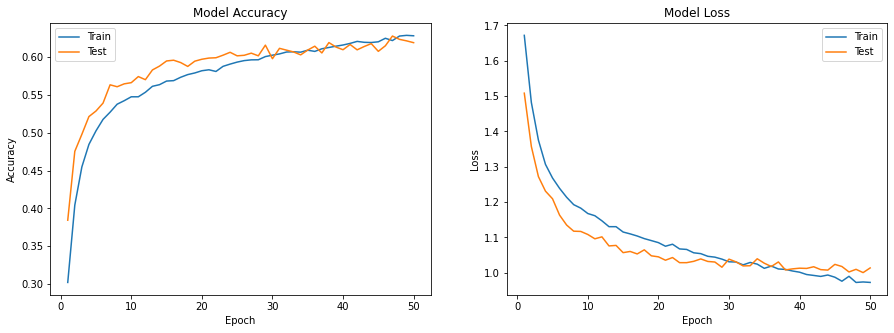

In [ ]:
display_model_history(model_history)

In [ ]:
model.save_weights('model_accuracy_62,1%.h5')
model_json = model.to_json()
with open("model_accuracy_62,1%.json", "w") as json_file:
  json_file.write(model_json)